In [49]:
#establishing mysql connection
import mysql.connector

In [50]:
db=mysql.connector.connect(host="localhost",user="root",passwd="shamasql5",database="ship")
print(db)

In [51]:
#extracting dataset from mysql
import pandas as pd
df=pd.read_sql_query("select * from titanic_ship",db)


In [52]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###### Importing necessary libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [55]:
#checking shape of dataset
df.shape

(891, 12)

The given dataset contains 891 rows & 12 columns

In [56]:
#checking column name
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
#checking datatype of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Column Description

1.PassengerID:Unique ID of passenger.

2.survived: Survival (0 = no; 1 = yes)

3.Pclass: Passenger class (1 = first; 2 = second; 3 = third)

4.Age: Age in years

5.sibsp: Number of siblings/spouses aboard

6.parch: Number of parents/children aboard

7.ticket: Ticket number

8.fare: Passenger fare

9.cabin: Cabin number

10.embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



In [58]:
#checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
#checking dataype of the column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Observation:

1.It has 11 features & 1 target column (survived).

2.Age & Fare are floats


3.PassengerID,Survived,Pclass,sibsp,parch are integers



4.Name,sex,Ticket,cabin,embarked are objects.

In [60]:
#checking for null value
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Although we can see some blank space in dataset,but it is showing no null value.
So,we replace blank space with nan value

In [61]:
#replacing ' ' with nan value
df.replace('',np.nan,inplace=True)

In [62]:
#replaceing 0.0 age as nan value
df['Age'].replace(0.0,np.nan,inplace=True)

In [63]:
#again checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Now we check description of numerical column

In [64]:
#making summary statistics for the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204203
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693412
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329000


###### Some Observation:

1.There are a total of 891 passengers in our dataset


2.There are very less mean value for the survived ,it means very less people survived

3.the mean of age are around 30,it means maxm middle age people were travelling

4.For age minm value is 0.42,it means some infants were also travelling (of few months).

5.We also notice that age contains some missing values

In [86]:
#imputing nan with mean value in Age colimn
df['Age'].fillna(df['Age'].mean(),inplace=True)

<AxesSubplot:>

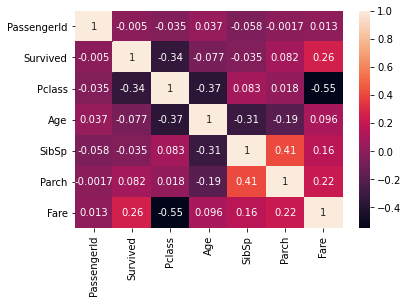

In [65]:
#relationship analysis
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'correlation with target variable')

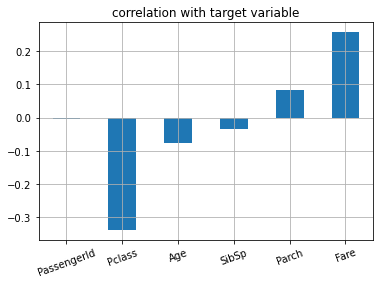

In [66]:
#checking correlation with the target variable .ie survived
df.drop('Survived',axis=1).corrwith(df['Survived']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('correlation with target variable')

In [67]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [68]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [69]:
#some graphical EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

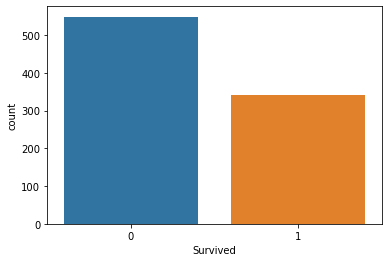

In [70]:
sns.countplot(x='Survived',data=df)

from above grah we find that no. of survived people is very less than that of not survived

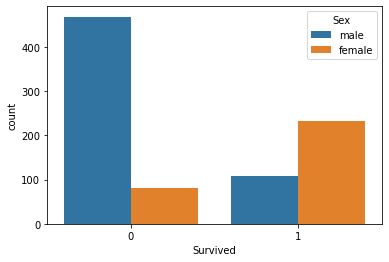

In [71]:
#lets check count of male survuved v/s count of female survived

sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

from above plot is is clear that out of the total male very few survived,while on the other hand most of the female survived

<AxesSubplot:ylabel='Frequency'>

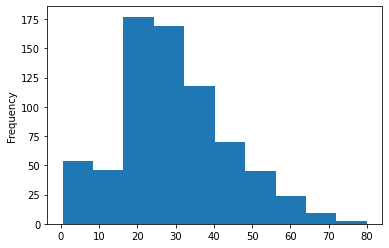

In [72]:
df['Age'].plot.hist()

it shows more middle age people are travelling on titanic

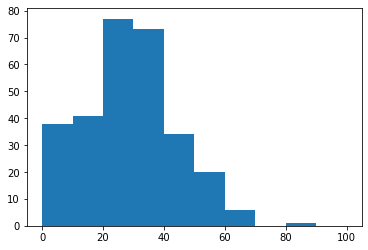

In [73]:
#checking people of which age range maxm survived
plt.hist(x='Age',bins=range(0,110,10),data=df.loc[df['Survived']==1])
plt.show()

it shows around 78 people of age b/w 20-30 survived

###### Age vs survived

<AxesSubplot:xlabel='Sex', ylabel='Age'>

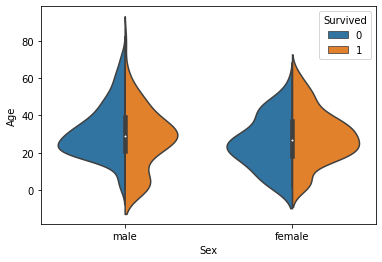

In [74]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

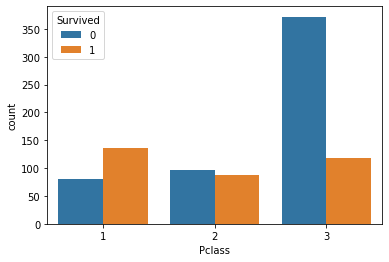

In [75]:
#lets check the no. of people survived or not survived in each class
sns.countplot(x='Pclass',hue='Survived',data=df)

From above graph we find that:-

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

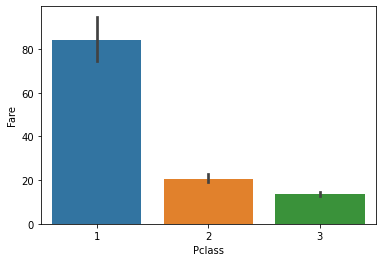

In [76]:
#lets check what was the avg fare price for 1st 2nd & 3rd clss people 

sns.barplot(x='Pclass',y='Fare',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

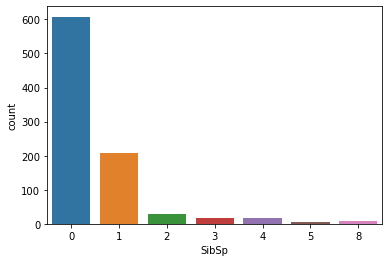

In [77]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

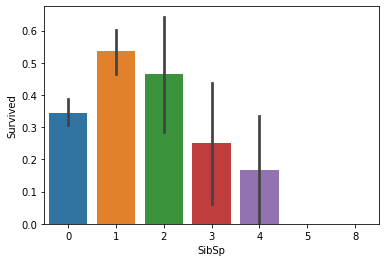

In [78]:
#sibsp
sns.barplot(x='SibSp',y='Survived',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

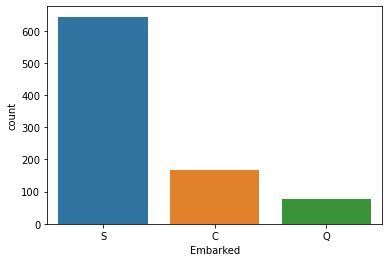

In [79]:
sns.countplot(x='Embarked',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

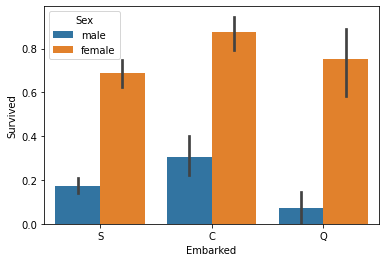

In [80]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=df)

Both male & female,who have boarded from porc C have higher survival rate